# Derivatives Overview

The purpose of this notebook is for me to refresh basic concepts of derivatives and to play around with python by plotting different payoff diagrams and graphs.

### Content
- 1. Intro
- 2. Forward
- 3. Options
- 4. Black Scholes
- 5. Greeks

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
from matplotlib import cm

plt.style.use('default')
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 8

# 1. Intro

A derivative is a contract whose value derives from an **underlying** asset such as a stock, bond, commodity, currency, interest rate, or index.

It obligates (or give the right to) two parties on a future transaction. 

It can be negotiated between two private parties in a customized over-the-counter (**OTC**) contract or traded as a standardized contract in an exchange market.

It is used for various reasons such as:
- **hedging**: protecting against certain type of risks, such as an airline company using derivatives to lock in the future price of fuel.
- **investing**: gaining exposure to an asset price movement with less capital upfront or with limited risk, typically with a long-term view.
- **speculating**: taking bets on price movements in the financial markets to generate short-term gains.
- **arbitrage**: exploiting temporary price differences between related markets or instruments to seek profit.


## 1.1 Some definitions:
- **Long position**: Holder (buyer) of the contract
- **Short position**: Seller (writer) of the contract

# 2. Forward
- A forward contract is a customized OTC agreement between two parties to buy or sell an asset at a fixed price on a specific future date.
- A futures contract is a standardized, exchange-traded agreement to buy or sell an asset at a fixed price on a specific future date.
    - They are mostly cash-settled.
    - They feature daily mark-to-market settlement with margin requirement.

## 2.1 Payoff at maturity

If we denote $S_T$ as the price of the underlying at maturity and $K$ as the delivery price, the final payoff of the contract is: $$ S_T - K $$
For a short forward contract we have: $$ K - S_T $$
For example, if $K = 100$  we have:

In [2]:
def plot_forward(ax, S, payoff, title):
    ax.plot(S, payoff,'r')
    ax.axhline(0, color='black', linewidth=0.9, linestyle=':')

    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_xlabel('$S_T$ Underlying price at maturity')
    ax.set_ylabel('Payoff')
    ax.set_title(title)

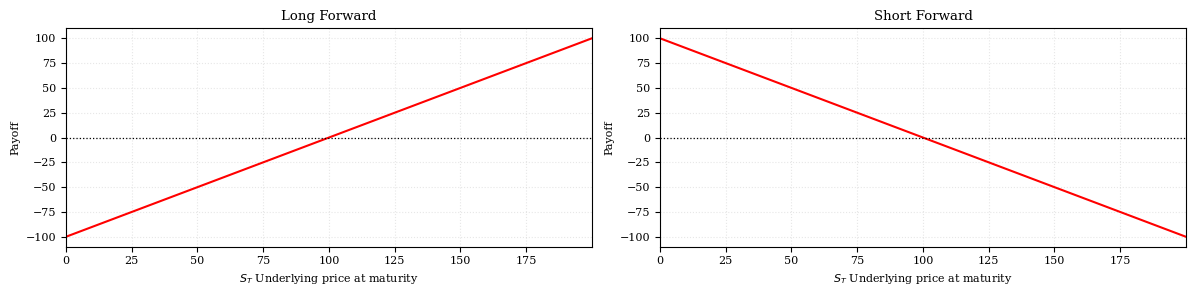

In [3]:
S = np.arange(0,200, 0.01)
K = 100

fig, axs = plt.subplots(1,2, figsize=(12, 3))
plot_forward(axs[0], S, S-K, 'Long Forward')
plot_forward(axs[1], S, K-S, 'Short Forward')
plt.tight_layout()
plt.show()

## 2.2 Valuation

### 2.2.1 Principle of time value of money and risk free interest rate

- **Time value of money**: 1 CHF today is worth more than 1 CHF in the future due to its potential earning opportunity today. [Wiki](https://en.wikipedia.org/wiki/Time_value_of_money)
- **Risk free rate**: The theoretical return on an investment with zero default risk, used as a baseline for valuing all assets.
    - Good proxies in Switzerland include **SARON** or yields on Swiss government bonds.

#### 2.2.1.1 Calculation with interest rate
$P$ = principal, $r$ = interest rate and $t$ = time
- **Simple interest**: Interest earned only on the initial principal, no interest on interest: $ P \times (1+ rt) $
- **Compound interest**: Interest earned on principal + previously accrued interest, at discrete intervals: $ P \times (1 + r/n)^{nt} $, where $n$ = compounds per year
- **Continuous compounding**: The limit as the compounding frequency, $n$, tends to infinity: $ P e^{rt} $

#### 2.2.1.2 Time value of money
- Future value of money:
    
    - Investing 100 CHF at a risk free rate of 3% (for illustration as [SNB rates](https://www.snb.ch/en/the-snb/mandates-goals/statistics/statistics-pub/current_interest_exchange_rates#t00) are ~0% in 2026) for 5 years yields: 
    $$ FV = 100 \times (1+0.03)^5 = 100 \times 1.1593 = 115.93 $$

- Present value of money:
    - To reverse the relationship and find today's value of a future cash flow, we *discount* it back using the risk-free rate. 
    
        Example: what is 100 CHF in 5 years worth today at 3% ?
        $$ PV = \frac{100}{(1 + 0.03)^5} = 100 \times (1+0.03)^{-5} = 86.26 $$

(todo a notebook about bonds ..)

### 2.2.2 Fair delivery price

Let's consider a forward contract on a non-paying dividend and without storage cost with delivery price $F$.

The value of the contract at maturity with payoff $S_T - F$ can be constructed as a portfolio composed of a stock and the same value invested in a risk-free asset.

- The stock has value $S_t$ today and $S_T$ at maturity
- A risk-free investment equal to $F$ at maturity is equal to $Fe^{-r(T-t)}$ today.

At $T$, the portfolio has a value $S_T - F$ and today at $t$, the value is equal to $S_t - Fe^{-r(T-t)}$.

At inception, the value of the contract is zero (no money exchanged, no premiums for both parties), therefore $S_t = Fe^{-r(T-t)}$ which implies $$ F_t = S_te^{r(T-t)} $$

$F_t$ refers to the forward price computed at time $t$

### 2.2.3 No arbitrage principle

We always assume there is no arbitrage opportunity when calculating theoretical prices of an asset. We say there is an arbitrage when we
can obtain a strictly positive benefit without risk out of nothing. There is no free-lunch.

Basic principle in finance to take advantage of price discrepancies: Sell high, buy low.

What happen if the forward price does not satisfy $ F_t = S_te^{r(T-t)} $ ?

Consider a long forward contract to purchase a stock in 3 months. Assume the current stock price is 40 CHF and the 3-month risk-free interest
rate is 5% per annum. The fair price of the forward would be $ 40 \times e^{0.05 \times 3/12}  = 40.46 $.


1) If the forward price is relatively high at 43 CHF
    - Action today:
        - An arbitrageur can borrow 40CHF at 5% for 3 months
        - Buy the asset for 40 CHF
        - Enter into a forward contract to sell the asset for 43 CHF in 3 months
    - Action in 3 months:
        - Sell the asset for 43 CHF
        - Repay the loan with interest of 40.46 CHF
    - Profit:
        $ 43 - 40.46 = 2.54 $

2) If the forward price is relatively low at 39 CHF
    - Action today:
        - An arbitrageur can short-sell the asset for 40 CHF
        - Invest 40 CHF at 5% for 3 months
        - Enter into a forward contract to buy the asset for 39 CHF in 3 months
    - Action in 3 months:
        - Buy the asset for 39 CHF
        - Close short position
        - Receive 40.46 CHF from investment
    - Profit:
        $ 40.46 - 39 = 1.46 $
    
We deduce that, for there to be no arbitrage opportunities, the forward price must be exactly $ F_t = S_te^{r(T-t)} $ = 40.46 CHF.

# 3. Options

- **Call** options are contract that give the right but not the obligation to the owner to **buy** an underlying asset at some prefix price $K$, the **strike price** at some moment in the future.
- **Put** options are contract that give the right but not the obligation to the owner to **sell** an underlying asset at some prefix price $K$, the **strike price** at some moment in the future.
- The option writer (short position) is obligated to sell (in a short call) or buy (in a short put) the underlying at expiration.
- An option that can be exercised only at expiry is an **European** option whereas if it can be exercised at anytime before expiration is called an **American** option.

## 3.1 Payoff
At expiration date $T$, for a given underlying price $S_T$ and a strike price $K$

- The payoff of a Long Call Option is given by $ max(S_T - K, 0 ) $
- The payoff of a Long Put Option is given by $ max(K - S_T, 0) $
- The payoff of a Short Call Option is given by $ - max(S_T - K, 0) $
- The payoff of a Short Put Option is given by $ - max(K-S_T, 0) $

## 3.2 Moneyness of an option
An intrinsic value of an option is the value it would have if the option is exercised immediately at time $t$ without taking into account the time value. If its value is positive the option is

- in the money **ITM**
    - for a call options: if $S_t > K$
    - for a put option: if $S_t < K$

if its intrinsic value is null the option is
- out-of-the-money **OTM**
    - for a call option: if $S_t < K$
    - for a put option: if $S_t > K$

- at-the-money **ATM** if $S_t = K$

In [4]:
def long_call(S, K, premium):
    c = np.maximum(S-K, 0) - premium
    return c

def long_put(S, K, premium):
    p = np.maximum(K-S, 0) - premium
    return p

def plot_options(ax, S, payoff, title):
    ax.plot(S, payoff,'r', label='Payoff')
    ax.axhline(0, color='black', linewidth=0.9, linestyle=':')
    ax.axvline(K, color='blue', linewidth=0.9, linestyle=':', label='Strike Price')
    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_xlabel('$S_T$ Underlying price at maturity')
    ax.set_ylabel('Payoff')
    ax.set_title(title)
    ax.legend()

For a strike price $K=100$ and a premium paid for the option (price of the option), we have the following payoffs diagram.

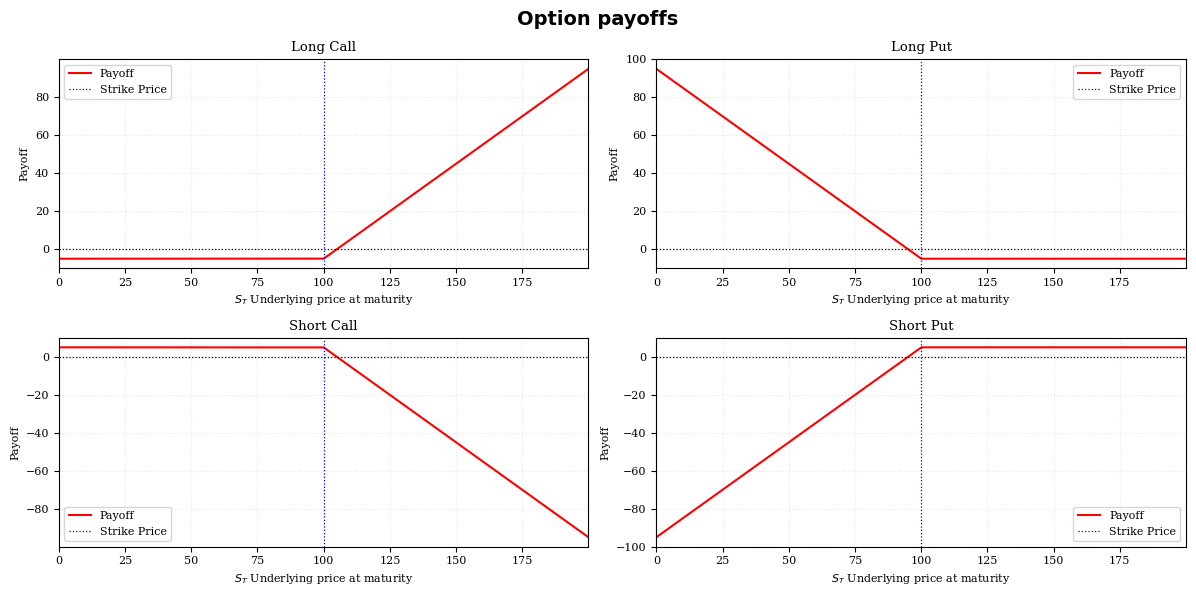

In [5]:
S = np.arange(0, 200, 0.01)
K = 100
premium = 5

fig, axs = plt.subplots(2, 2, figsize=(12, 6))

plot_options(axs[0][0], S, long_call(S,K, premium), 'Long Call')
plot_options(axs[0][1], S, long_put(S,K, premium), 'Long Put')
plot_options(axs[1][0], S, -long_call(S,K, premium), 'Short Call')
plot_options(axs[1][1], S, -long_put(S,K, premium), 'Short Put')

plt.suptitle("Option payoffs", fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.tight_layout()
plt.show()

Standard American and European call and put options are known as *plain vanilla options*. 

Beyond these, a wide variety of *exotic options* exist. Here are a few examples:

## 3.3 Binary options

A binary or digital *cash-or-nothing* option pays a fixed amount $Q$ at expiry if it ends up in the money, otherwise nothing.

$$
\text{Payoff of a binary CALL option} = 
\begin{cases} 
Q & \text{if } S_T > K \\
0 & \text{if } S_T \leq K 
\end{cases}
$$

$$
\text{Payoff of a binary PUT option} = 
\begin{cases} 
Q & \text{if } S_T < K \\
0 & \text{if } S_T \geq K 
\end{cases}
$$

In [6]:
def binary_call(S, K, Q, premium):
    bc = Q*np.where(S>K, 1, 0) - premium
    return bc

def binary_put(S, K, Q, premium):
    bp = Q*np.where(S<K, 1, 0) - premium
    return bp

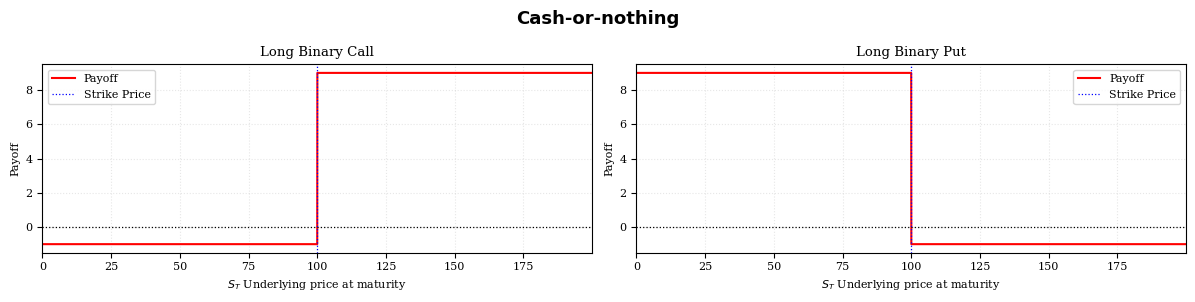

In [7]:
S = np.arange(0, 200, 0.01)
K = 100
Q = 10
premium = 1

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

plot_options(axs[0], S, binary_call(S, K, Q, premium), 'Long Binary Call')
plot_options(axs[1], S, binary_put(S, K, Q, premium), 'Long Binary Put')
plt.suptitle('Cash-or-nothing', fontweight='bold', fontsize=13, fontfamily='sans-serif')
plt.tight_layout()

Another variant is an *asset-or-nothing* option that gives the holder to receive the final value of the underlying asset $S_T$ if the option expires ITM.

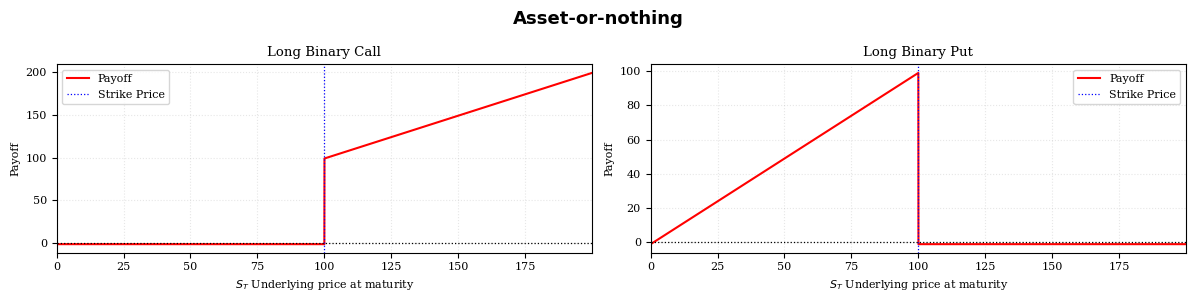

In [8]:
S = np.arange(0, 200, 0.01)
K = 100
premium = 1

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

plot_options(axs[0], S, binary_call(S, K, S, premium), 'Long Binary Call')
plot_options(axs[1], S, binary_put(S, K, S, premium), 'Long Binary Put')
plt.suptitle('Asset-or-nothing', fontweight='bold', fontsize=13, fontfamily='sans-serif')
plt.tight_layout()

## 3.4 Barrier options

Barrier options are options where the payoff depends on whether the underlying asset reaches a certain level during a period of time.

There are four main types of barrier options:

- **Up and Out**: price of the underlying starts below the barrier, if it goes up and reaches the barrier, the option becomes worthless (knocked out)
- **Down and Out**: price of the underlying starts above the barrier, if it goes down and reaches the barrier, the option becomes worthless (knocked out)
- **Up and In**: price of the underlying starts below the barrier, if it goes up and reaches the barrier, the option is activated (knocked in)
- **Down and In**: price of the underlying starts above the barrier, if it goes down and reaches the barrier, the option is activated (knocked in)

Example of simulated price paths for an underlying asset in which the down-and-in barrier is triggered.

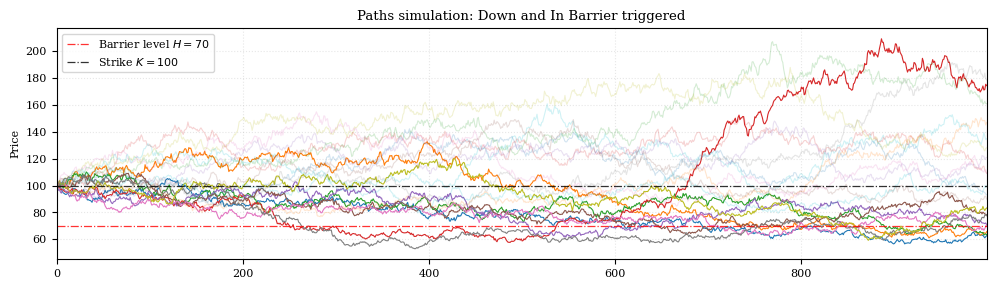

In [9]:
S0=100; mu=0; sigma=0.4; T=1.0; n_steps=1000; n_sims=20; dt=T/n_steps
np.random.seed(15)
S_T = S0 * np.cumprod(np.exp( (mu-sigma**2/2)*dt + sigma*np.sqrt(dt)*(np.random.standard_normal((n_sims, n_steps)))), axis=1)

barrier=70
K=100
down_in_filter = np.any(S_T < barrier, axis=1)

plt.figure(figsize=(12,3))
plt.plot(S_T[down_in_filter].T, linewidth=0.8)
plt.plot(S_T[~down_in_filter].T, linewidth=0.8, alpha=0.2)
plt.axhline(y=barrier, linestyle=":", color = 'r', ls= '-.', alpha=0.8, lw=0.9, label=f'Barrier level $H={barrier}$')
plt.axhline(y=K, linestyle=":", color = 'black', ls= '-.', alpha=0.8, lw=0.9, label=f'Strike $K={K}$')

plt.grid(linestyle=':', alpha=0.3)
plt.margins(x=0)
plt.legend()
plt.ylabel('Price')
plt.title('Paths simulation: Down and In Barrier triggered')

plt.show()

We observe that the red path touches the barrier, but ends well above the strike price. The down-and-in barrier activates the option, yet it finishes out of the money for a put option.

Example of payoffs for a Down and In Put option and a Down and Out Put option:

In [10]:
def plot_barrier_down_put(ax, S, K, H, premium, title, what):
    if what == "down_in":
        S_IN = S[S<K] 
        S_OUT = S[S>H]
        ax.plot(S_OUT, -premium*np.ones_like(S_OUT), 'r', label='Put Payoff (Barrier not hit)')
        ax.plot(S_IN, long_put(S_IN, K, premium),'r-.', label='Put Payoff (Barrier hit)')
    elif what == "down_out":
        S_OUT = S[S<K]
        S_IN = S[S>H]
        ax.plot(S_IN, long_put(S_IN, K, premium), 'r', label='Put Payoff (Barrier not hit)')
        ax.plot(S_OUT, -premium * np.ones_like(S_OUT), 'r-.', label='Put Payoff (Barrier hit)')

    ax.axhline(y=0, c='black', linewidth=0.9, linestyle=':')
    ax.axvline(x=K, c='blue', linewidth=0.9, linestyle=':', label=f'Strike $K={K}$')
    ax.axvline(x=H, c='green', linewidth=0.9, linestyle=':', label=f'Barrier level $H={H}$')
    ax.tick_params(labelleft=True)
    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_ylabel('Payoff')
    ax.set_xlabel('$S_T$ Underlying price at maturity')
    ax.legend()
    ax.set_title(title)

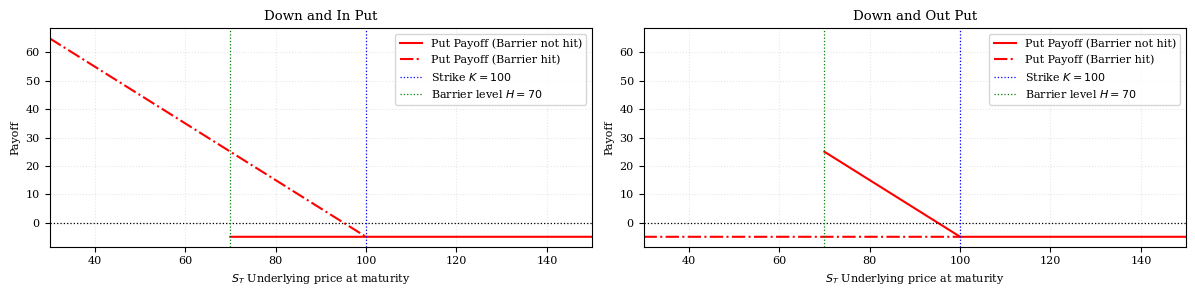

In [11]:
K = 100
H = 70
premium = 5
S = np.arange(30,150,0.01)

fig, axs = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
plot_barrier_down_put(axs[0], S, K, H, premium, 'Down and In Put', 'down_in')
plot_barrier_down_put(axs[1], S, K, H, premium, 'Down and Out Put', 'down_out')
plt.tight_layout()
plt.show()

## 3.5 Combinations of options

It is also possible to combine multiple calls and puts with different strike prices or expiration date on the same underlying asset in order to take advantage of different market conditions. Here are some popular strategies using different strike prices.

In [12]:
def plot_options_combination(ax, S, payoff1, label1, payoff2, label2, combined, label3):
    ax.plot(S, payoff1, 'r-.', linewidth=0.9, label=label1)
    ax.plot(S, payoff2, 'b-.', linewidth=0.9, label=label2)
    ax.plot(S, combined, 'r')
    ax.axhline(0, color='black', linewidth=0.9, linestyle=':')

    ax.set_title(label3 + "\n", fontweight='bold', fontsize=11, fontfamily='sans-serif')
    ax.text(0.5, 1.02, label1 + ", " + label2, ha="center", va="bottom", fontsize=9, transform=ax.transAxes)

    ax.set_xlabel('$S_T$ Underlying price at maturity')
    ax.set_ylabel('Payoff')
    ax.grid(linestyle=':', alpha=0.3)
    ax.legend()
    ax.margins(x=0)

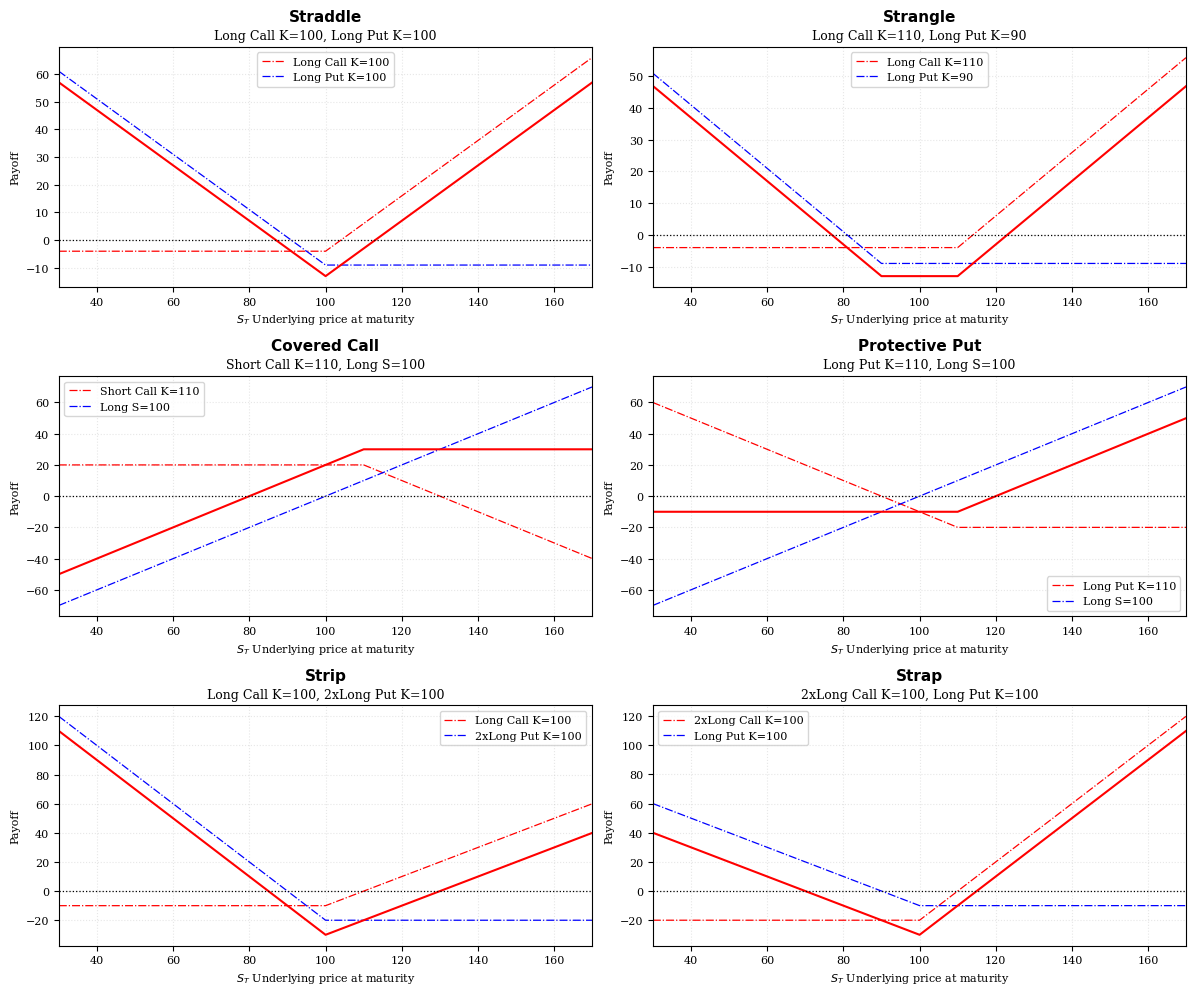

In [13]:
S = np.arange(30, 170, 0.1)

fig, axs = plt.subplots(3,2, figsize=(12,10))

# Straddle
K = 100
lc = long_call(S, K, 4)
lp = long_put(S, K, 9)
plot_options_combination(axs[0,0], S, lc, f'Long Call K={K}', lp, f'Long Put K={K}', lp+lc, 'Straddle')

#Strangle
lc = long_call(S, 110, 4)
lp = long_put(S, 90, 9)
plot_options_combination(axs[0,1], S, lc, 'Long Call K=110', lp, 'Long Put K=90', lp+lc, 'Strangle')

#Covered Call
sc = -long_call(S, 110, 20)
plot_options_combination(axs[1,0], S, sc, 'Short Call K=110', S-100, 'Long S=100', S-100+sc, 'Covered Call')

# Protective Put
lp = long_put(S, 110, 20)
plot_options_combination(axs[1,1], S, lp, 'Long Put K=110', S-100, 'Long S=100', S-100+lp, 'Protective Put')

# Strip
lc = long_call(S,100,10)
lp = long_put(S, 100, 10)
plot_options_combination(axs[2,0], S, lc, 'Long Call K=100', 2*lp, '2xLong Put K=100', lc+lp+lp, 'Strip')

# Strap
lc = long_call(S, 100, 10)
lp = long_put(S, 100, 10)
plot_options_combination(axs[2,1], S, 2*lc, '2xLong Call K=100', lp, 'Long Put K=100', lc+lc+lp, 'Strap')

plt.tight_layout()
plt.show()

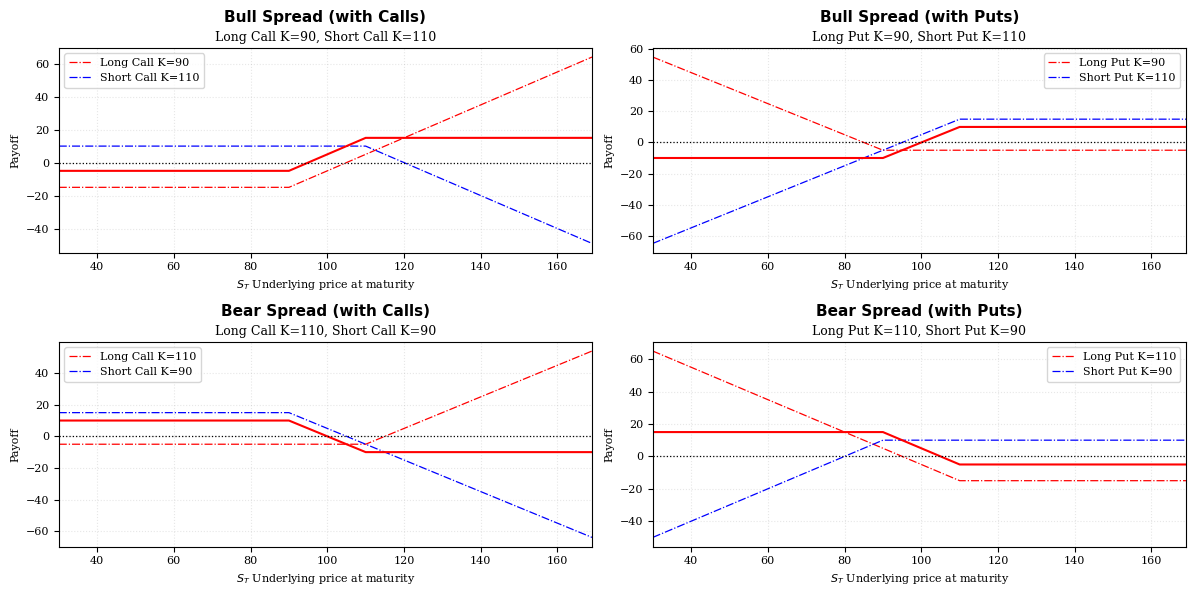

In [14]:
S = np.arange(30, 170, 1)

fig, axs = plt.subplots(2,2, figsize=(12, 6))

# Bull spread
lc = long_call(S, 90, 15)
sc = -long_call(S,110, 10)
plot_options_combination(axs[0,0], S, lc, 'Long Call K=90', sc, 'Short Call K=110', lc+sc, 'Bull Spread (with Calls)')

# Bull spread PUT
lp = long_put(S, 90, 5)
sp = -long_put(S, 110, 15)
plot_options_combination(axs[0,1], S, lp, 'Long Put K=90', sp, 'Short Put K=110', lp+sp, 'Bull Spread (with Puts)')

# Bear Spread
lc = long_call(S, 110, 5)
sc = -long_call(S, 90, 15)
plot_options_combination(axs[1,0], S, lc, 'Long Call K=110', sc, 'Short Call K=90', lc+sc, 'Bear Spread (with Calls)')

lp = long_put(S, 110, 15)
sp = -long_put(S, 90, 10)
plot_options_combination(axs[1,1], S, lp, 'Long Put K=110', sp, 'Short Put K=90', lp+sp, 'Bear Spread (with Puts)')

plt.tight_layout()

# 4. Black Scholes Merton 

The Black-Scholes model prices European options using a closed-form formula derived from a no-arbitrage partial differential equation PDE.
$$\frac{\partial V}{\partial t} + rS\frac{\partial V}{\partial S} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} = rV$$

It assumes stock prices follow geometric Brownian motion
$$ dS_t = \mu S_t dt + \sigma S_t dW_t $$

under risk-neutral dynamics.
where:
- $V$ = option price
- $S$ = underlying price  
- $t$ = time
- $r$ = risk-free rate
- $\sigma$ = volatility
- $\mu$ = drift of the underlying
- $W_t$ = a Wiener process or Brownian motion

A closed-formed formula for a **European Call** option is:

$$
C(S_0, K, T, r, \sigma) = S_0 \mathcal{N}(d_1) - K e^{-rT} \mathcal{N}(d_2)
$$

For a **Europen Put** option: 

$$
P(S_0, K, T, r, \sigma) = K e^{-rT} \mathcal{N}(-d_2) - S_0 \mathcal{N}(-d1)
$$

where
$$
d_1 = \frac{\ln(S_0/K) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}},  \quad

d_2 = d_1 - \sigma\sqrt{T}
$$

and

- $S_0$ = current stock price
- $K$ = strike price
- $r$ = risk-free rate
- $\sigma$ = volatility
- $T$ = time to expiry
- $\mathcal{N}(.)$: cumulative normal distribution



In [15]:
def d1(S, K, T, r, sigma):
    return (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma) - sigma*np.sqrt(T)

def N(x):
    return norm.cdf(x)

def BSM_call(S, K, T, r, sigma):
    x1 = d1(S, K, T, r, sigma)
    x2 = d2(S, K, T, r, sigma)
    return S*N(x1) - K*np.exp(-r*T)*N(x2)

def BSM_put(S, K, T, r, sigma):
    x1 = d1(S, K, T, r, sigma)
    x2 = d2(S, K, T, r, sigma)
    return K*np.exp(-r*T)*N(-x2) - S*N(-x1)

def plot_option_price(ax, S, payoff, title):
    ax.plot(S, payoff, 'r')
    ax.axhline(0, color='black', linewidth=0.9, linestyle=':')
    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_xlabel('$S_0$ Underlying price')
    ax.set_ylabel(f'{title} Price')
    ax.set_title(title)

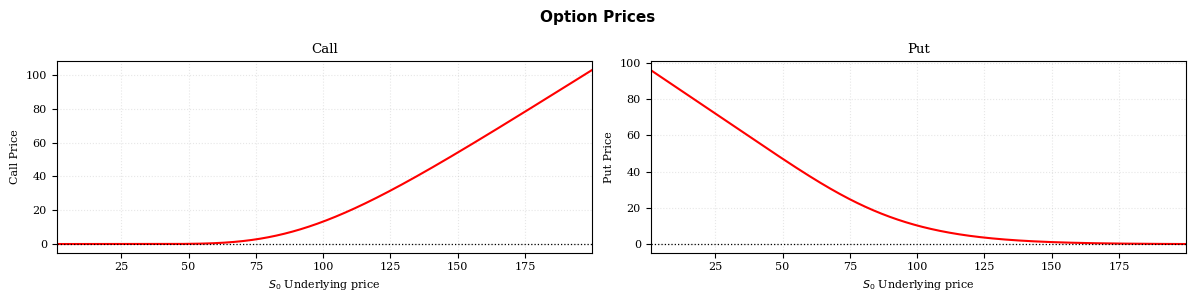

In [16]:
S = np.arange(1, 200, 0.1)
K = 100
T = 1.0
r = 0.03
sigma = 0.3
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

plot_option_price(axs[0], S, BSM_call(S, K, T, r, sigma), 'Call')
plot_option_price(axs[1], S, BSM_put(S, K, T, r, sigma), 'Put')
plt.suptitle('Option Prices', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.tight_layout()

How does option prices change depending on various parameters. 

In [17]:
def plot_3d_option(ax, x, y, z, title, xlabel, ylabel, zlabel):
    ax.plot_wireframe(x, y, z, color='black', alpha=0.8)
    surf =  ax.plot_surface(x, y, z, cmap=cm.jet, alpha=0.9)

    plt.colorbar(surf, shrink=0.3, aspect=30)
    ax.set_title(title, fontweight='bold', fontsize=12, x = 0.6, y = 0.99)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    ax.view_init(elev=20, azim=280, roll=0)
    ax.set_box_aspect([2,1.95,1])

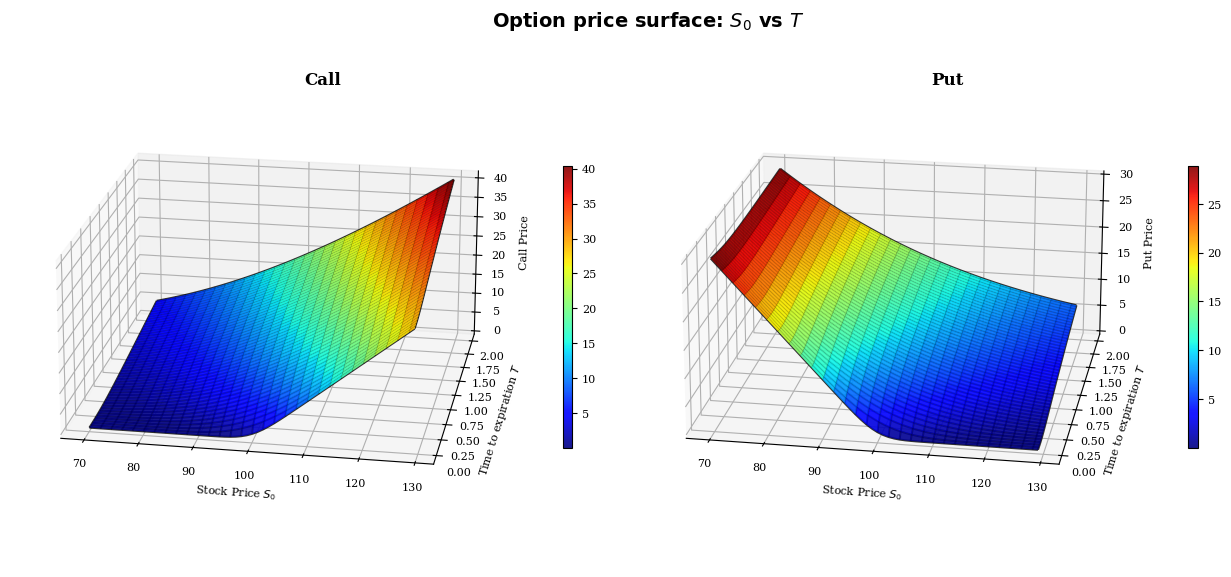

In [18]:
s = np.arange(70, 130, 1)
t = np.arange(0.01, 2.0, 0.01)
S, T = np.meshgrid(s, t)
K=100; sigma=0.3; r=0.03
call_prices = BSM_call(S, K, T, r, sigma)
put_prices = BSM_put(S, K, T, r, sigma)

fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
plot_3d_option(ax1, S, T, call_prices, 'Call', 'Stock Price $S_0$', 'Time to expiration $T$', 'Call Price')
plot_3d_option(ax2, S, T, put_prices, 'Put', 'Stock Price $S_0$', 'Time to expiration $T$', 'Put Price')

plt.suptitle('Option price surface: $S_0$ vs $T$',fontweight='bold', fontfamily='sans-serif', fontsize=14, y = 0.78)
plt.tight_layout()
plt.show()

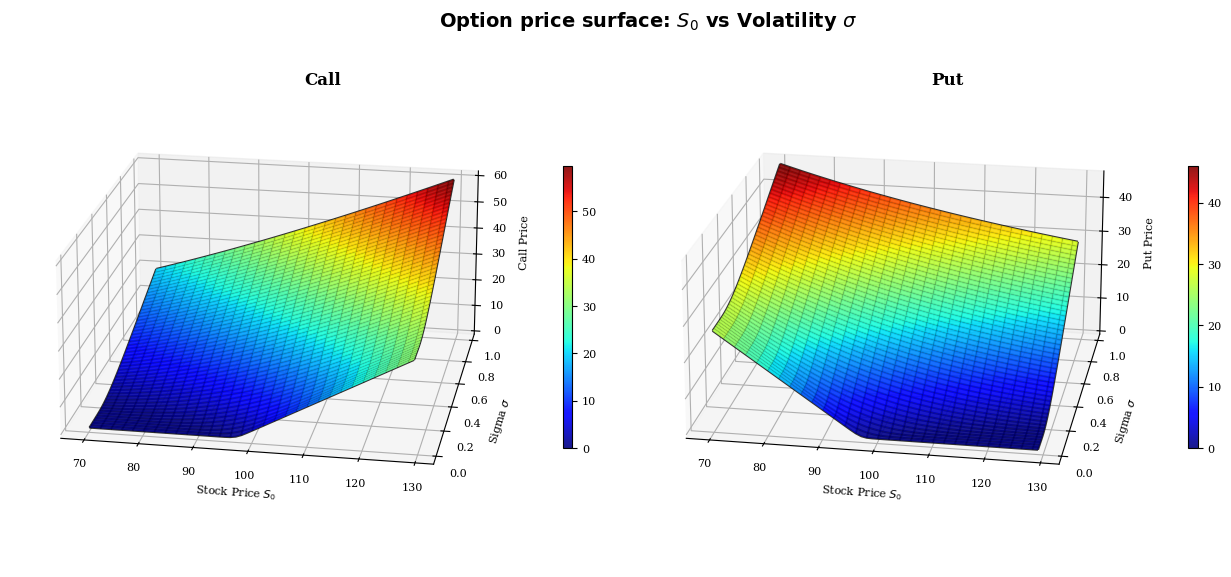

In [19]:
s = np.arange(70, 130, 1)
sigma = np.arange(0.01, 1.0, 0.01)
S, SIGMA = np.meshgrid(s, sigma)
K=100; T=1.0; r=0.03
call_prices_sigma = BSM_call(S, K, T, r, SIGMA)
put_prices_sigma = BSM_put(S, K, T, r, SIGMA)


fig = plt.figure(figsize=(13, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
plot_3d_option(ax1, S, SIGMA, call_prices_sigma, 'Call', 'Stock Price $S_0$', r'Sigma $\sigma$', 'Call Price')
plot_3d_option(ax2, S, SIGMA, put_prices_sigma, 'Put', 'Stock Price $S_0$', r'Sigma $\sigma$', 'Put Price')
plt.suptitle(r'Option price surface: $S_0$ vs Volatility $\sigma$',fontweight='bold', fontfamily='sans-serif', fontsize=14, y = 0.78)
plt.tight_layout()
plt.show()

# 5. Greeks

Option Greeks measure the exposure of option price to movement of different factors such as the underlying price, time and volatility.

## 5.1 Delta

Delta $ \Delta $ is the measure of rate of change of the option price with respect to the underlying price. It is the first derivative of the option price with respect to $S_0$

$$ \Delta_{call} = \frac{\partial C}{\partial S} = \mathcal{N}(d_1) $$

$$ \Delta_{put} = \frac{\partial P}{\partial S} = \mathcal{N}(d_1) - 1 $$

- Call options have a positive delta range from 0 to 1.
    - A Delta of 0.4 means that when the underlying price rises by 1 CHF, the call option price increases by 0.4 CHF (other factors unchanged).
- Put options have a negative delta range from -1 to 0.
    - A Delta of -0.4 means that when the underlying price rises by 1 CHF, the put option price decreases by 0.4 CHF (other factors unchanged).

- At-the-money options usually have a delta near 0.5 (put delta near -0.5)
- As expiration date nears, in-the-money delta increases toward 1, at-the-money delta remains around 0.5, out-of-the money delta decreases toward 0.

In [20]:
def delta(S, K, T, r, sigma):
    return N(d1(S, K, T, r, sigma))

def plot_delta_option(ax, S, K, T, r, sigma, title):
    opt = BSM_call(S, K, T, r, sigma) if title=='call' else BSM_put(S, K, T, r, sigma)
    d = delta(S, K, T, r, sigma) if title=='call' else delta(S, K, T, r, sigma) - 1
    mid_d = 0.5 if title=='call' else -0.5

    ax.plot(S, d, 'r', alpha=0.8, label='Delta')
    ax.axhline(mid_d, color='black', linewidth=0.9, linestyle=':', label=f'Delta={mid_d}')

    sec_axis = ax.twinx()
    sec_axis.plot(S, opt, 'b-.', linewidth=0.7, alpha=0.7, label=f'{title.capitalize()} Price')
    sec_axis.set_ylabel(f'{title.capitalize()} Price')
    sec_axis.legend(loc='lower right')

    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_xlabel('$S_0$ Underlying price')
    ax.set_ylabel('Delta')
    ax.set_title(f'Delta {title.capitalize()}')
    ax.legend()

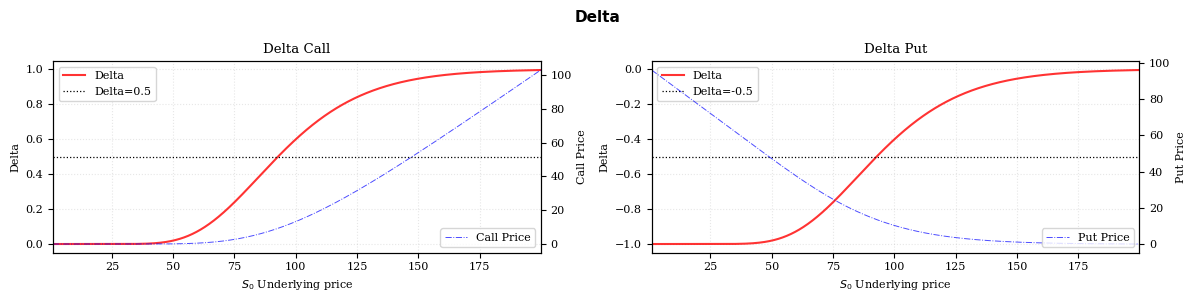

In [21]:
S = np.arange(1, 200, 0.1)
K = 100
T = 1.0
r = 0.03
sigma = 0.3

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
plot_delta_option(axs[0], S, K, T, r, sigma, 'call')
plot_delta_option(axs[1], S, K, T, r, sigma, 'put')
plt.suptitle('Delta', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.tight_layout()
plt.show()

In [22]:
def plot_greek_time_moneyness(greek_func, S, K, T, r , sigma, title):
    labels = ['In the money', 'At the money', 'Out of the money']
    style = ['r:','r', 'r-.']

    for k, label, st in zip(K, labels, style):
        plt.plot(T, greek_func(S, k, T, r, sigma), st, label=f'{label} K={k}', linewidth=0.9, alpha=0.9)
    if greek_func.__name__ == 'delta':
        plt.axhline(0.5, color='black', linewidth=0.9, linestyle=':', label='Delta=0.5')

    plt.ylabel(greek_func.__name__)
    plt.xlabel('Time to maturity $T$')
    plt.title(title)
    plt.legend()
    plt.grid(linestyle=':', alpha=0.3)
    plt.margins(x=0)

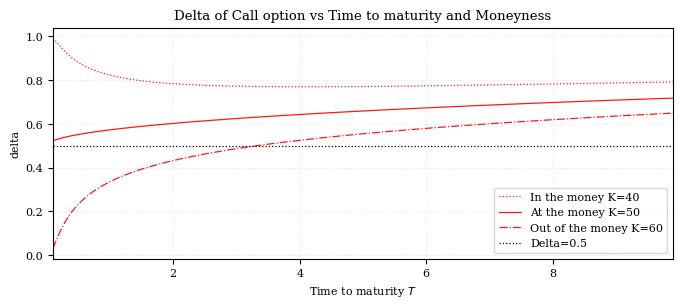

In [23]:
T = np.arange(0.1, 10, 0.1)
K = np.array([40, 50, 60])
sigma = 0.3
r = 0.01
S=50

plt.figure(figsize=(8,3))
plot_greek_time_moneyness(delta, S, K, T, r , sigma, 'Delta of Call option vs Time to maturity and Moneyness')

Notice how delta behave as we approach expiration for ITM, ATM or OTM options. 

## 5.2 Gamma

Gamma $ \Gamma $ is the measure of rate of change of the option delta with respect to the underlying price. It is the derivative of the Delta with respect to $S_0$, or the second derivative of the option price with respect to $S_0$

$$ \Gamma_{call} = \Gamma_{put} = \frac{\partial^2 C}{\partial S^2} = \frac{\partial^2 P}{\partial S^2} = \frac{\mathcal{N}'(d_1)}{S_0 \sigma \sqrt{T}} $$

where $\mathcal{N}'(.)$ is the PDF of the normal distribution

- Call and Put options have a positive delta range from 0 to 1.
- Gamma is higher for options that are at-the-money and close to expiration as the delta near expiration tend to move either to 0 or 1 (0 or -1 for put options)

In [24]:
def gamma(S, K, T, r, sigma):
    return norm.pdf(d1(S, K, T, r, sigma)) / (S * sigma * np.sqrt(T))

def plot_gamma_option(ax, S, K, T, r, sigma):
    delta_call = delta(S, K, T, r, sigma)
    delta_put = delta(S[::-1], K, T, r, sigma) - 1 # Reverse S array as we want delta_put ordered by moneyness
    g = gamma(S, K, T, r, sigma)

    ax.plot(S, g, 'r', label=f'Gamma T = {T}')

    sec_axis = ax.twinx()
    sec_axis.plot(S, delta_call, 'black', linestyle="-.", linewidth=0.8, alpha=0.8, label='Call Delta')
    sec_axis.plot(S, delta_put, 'black', linestyle=":", linewidth=0.8, alpha=0.8, label='Put Delta')
    sec_axis.set_ylabel('Delta')
    sec_axis.legend(loc='upper left', bbox_to_anchor=(0, 0.85))
    sec_axis.margins(x=0)

    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_ylabel(f'Gamma')
    ax.tick_params(labelleft=True)

    x_zones = [30, K, K+70]  
    ax.set_xticks(x_zones)
    ax.set_xticklabels(['Out-ot-the Money', 'At-the-Money', 'In-the-Money'])
    ax.legend(loc='upper left')
    ax.set_title(f'Gamma T={T}')

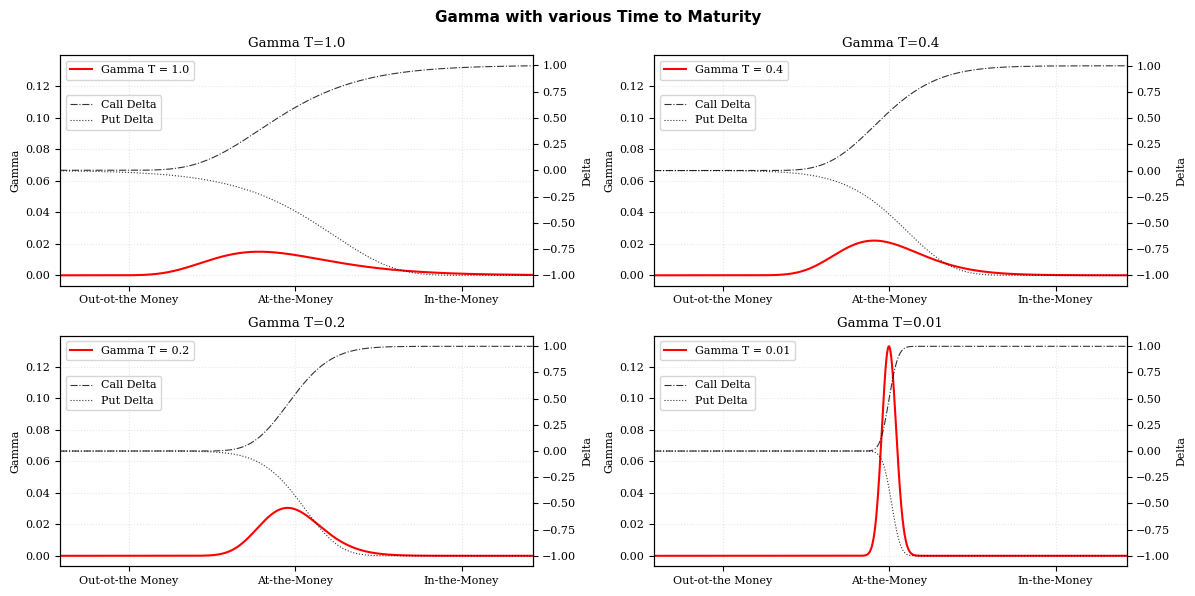

In [25]:
S = np.arange(1, 200, 0.1)
K = 100
T = np.array([1.0, 0.4, 0.2, 0.01])
r = 0.03
sigma = 0.3

fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharey=True)
axs_flat = axs.flat
for idx, t in enumerate(T):
    plot_gamma_option(axs_flat[idx], S, K, t, r, sigma)

plt.suptitle('Gamma with various Time to Maturity', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.tight_layout()
plt.show()

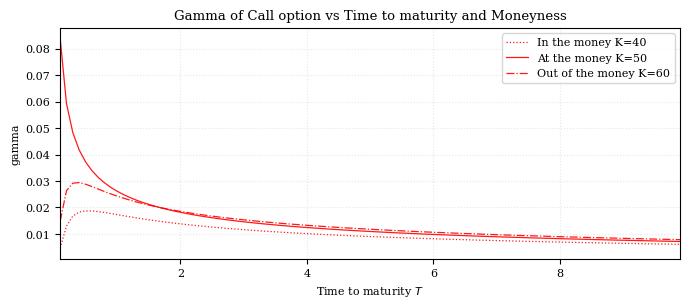

In [26]:
T = np.arange(0.1, 10, 0.1)
K = np.array([40, 50, 60])
sigma = 0.3
r = 0.01
S=50

plt.figure(figsize=(8,3))
plot_greek_time_moneyness(gamma, S, K, T, r , sigma, 'Gamma of Call option vs Time to maturity and Moneyness')

Notice how gamma increases for at-the-money options as expiration approaches.

## 5.3 Vega

Vega $ \mathcal{V}$ is the measure of rate of change of the option price with respect to the volatility. It is the derivative of the option price with respect to $\sigma$.

$$ \mathcal{V}_{call} = \mathcal{V}_{put} = \frac{\partial C}{\partial \sigma} = \frac{\partial P}{\partial \sigma} = S_0 \sqrt{T} \mathcal{N}'(d1) $$

- Call and Put options have a positive vega.
- Vega increases with longer time to maturity.

In [27]:
def vega(S, K, T, r, sigma):
    return norm.pdf(d1(S, K, T, r, sigma)) * np.sqrt(T) * S

def plot_greek(ax, greek_func, S, K, T, r, sigma):
    v = greek_func(S, K, T, r, sigma)
    label = f'{greek_func.__name__}'.capitalize()
    ax.plot(S, v, label=f'{greek_func.__name__} T={T}', linewidth=0.9)
    ax.grid(linestyle=':', alpha=0.3)
    ax.margins(x=0)
    ax.set_xlabel('$S_0$ Underlying price')
    ax.set_ylabel(label)
    ax.set_title(label)

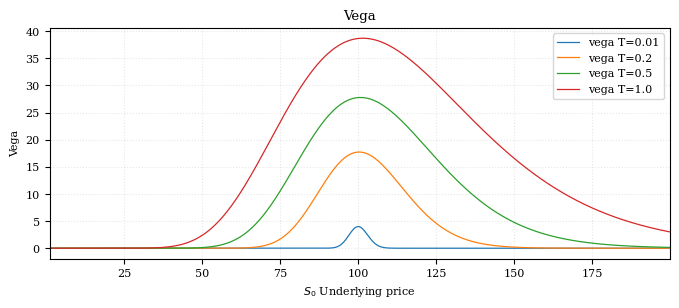

In [28]:
S = np.arange(1, 200, 0.1)
K = 100
T = np.array([0.01, 0.2, 0.5, 1])
r = 0.03
sigma = 0.3

fig, axs = plt.subplots(1,1, figsize=(8,3))
for t in T:
    plot_greek(axs, vega, S, K, t, r, sigma)
axs.legend()
plt.show()

## 5.4 Theta

Theta $ \Theta$ is the measure of rate of change of the option price with respect to passage of time. It is the derivative of the option price with respect to $T$.
$$ \Theta_{call} = \frac{\partial C}{\partial T} = \frac{S_0 \mathcal{N}'(d1) \sigma}{2 \sqrt(T)}  - r K e^{-rT} \mathcal{N}(d2)$$
$$ \Theta_{put} = -\frac{\partial P}{\partial T} = \frac{S_0 \mathcal{N}'(d1) \sigma}{2 \sqrt(T)}  + r K e^{-rT} \mathcal{N}(-d2)$$

note that $ \Theta_{call} - \Theta_{put} = r K e^{-rT} $

- Theta is usually negative, as time passes, the option tends to become less valuable.
- Theta is large and negative for option at-the-money close to expiration.
- There is no uncertainty about the passage of time (cannot hedge time) but can be used as a proxy to gamma in a delta-neutral portfolio (negative relation).
    - Recall PDE of Black-Scholes: can be rewritten  as $ \Theta + rS\Delta + \frac{1}{2}\sigma^2 S^2 \Gamma = r\Pi $, with $\Delta = 0$ and $\Pi$ the value of a portfolio of an option, we have $\Theta + \frac{1}{2}\sigma^2 S^2\Gamma = r \Pi $

In [29]:
def theta(S, K, T, r, sigma):
    return - sigma * norm.pdf(d1(S, K, T, r, sigma)) * S / (2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2(S, K, T, r, sigma))

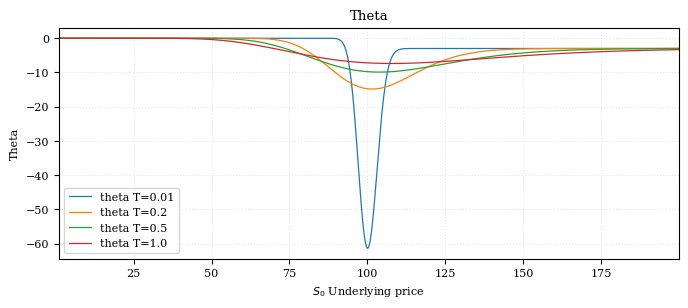

In [30]:
S = np.arange(1, 200, 0.1)
K = 100
T = np.array([0.01, 0.2, 0.5, 1])
r = 0.03
sigma = 0.3

fig, axs = plt.subplots(1,1, figsize=(8,3))
for t in T:
    plot_greek(axs, theta, S, K, t, r, sigma)
axs.legend()
plt.show()

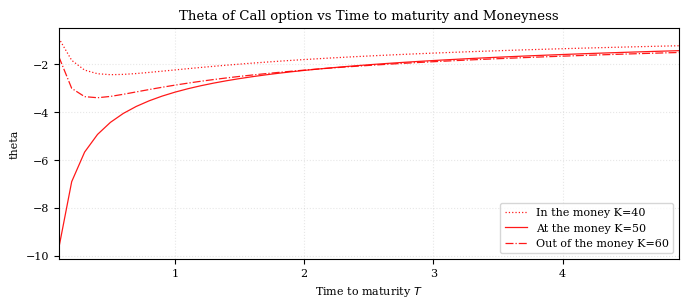

In [31]:
T = np.arange(0.1, 5, 0.1)
K = np.array([40, 50, 60])
sigma = 0.3
r = 0.01
S=50

plt.figure(figsize=(8,3))
plot_greek_time_moneyness(theta, S, K, T, r , sigma, 'Theta of Call option vs Time to maturity and Moneyness')

Notice how theta gets massively negative for at-the-money options as expiration approaches.

## 5.5 Rho

Rho $ \Rho$ is the measure of rate of change of the option price with respect to the interest rate. It is the derivative of the option price with respect to $r$.
$$ \Rho_{call} = \frac{\partial C}{\partial r} =  K T e^{-rT} \mathcal{N}(d2) $$
$$ \Rho_{put} = -\frac{\partial P}{\partial r} = - K T e^{-rT} \mathcal{N}(-d2) $$

- Rho is positive for call options and increases with time to maturity, especially when it is ITM
- Rho is negative for put options and decreases (larger negative value) with time to maturity, especially when it is ITM. 

In [32]:
def rho(S, K, T, r, sigma):
    return K*T*np.exp(-r*T)*N(d2(S, K, T, r, sigma))

def rho_put(S, K, T, r, sigma):
    return -K*T*np.exp(-r*T)*N(-d2(S, K, T, r, sigma))

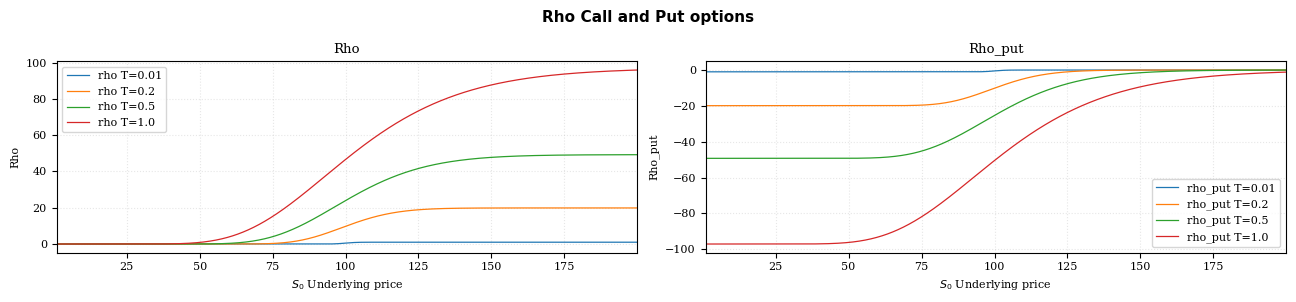

In [33]:
S = np.arange(1, 200, 0.1)
K = 100
T = np.array([0.01, 0.2, 0.5, 1])
r = 0.03
sigma = 0.3

fig, axs = plt.subplots(1,2, figsize=(13,3))
for t in T:
    plot_greek(axs[0], rho, S, K, t, r, sigma)
axs[0].legend()

for t in T:
    plot_greek(axs[1], rho_put, S, K, t, r, sigma)
axs[1].legend()

plt.suptitle('Rho Call and Put options', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.tight_layout()
plt.show()

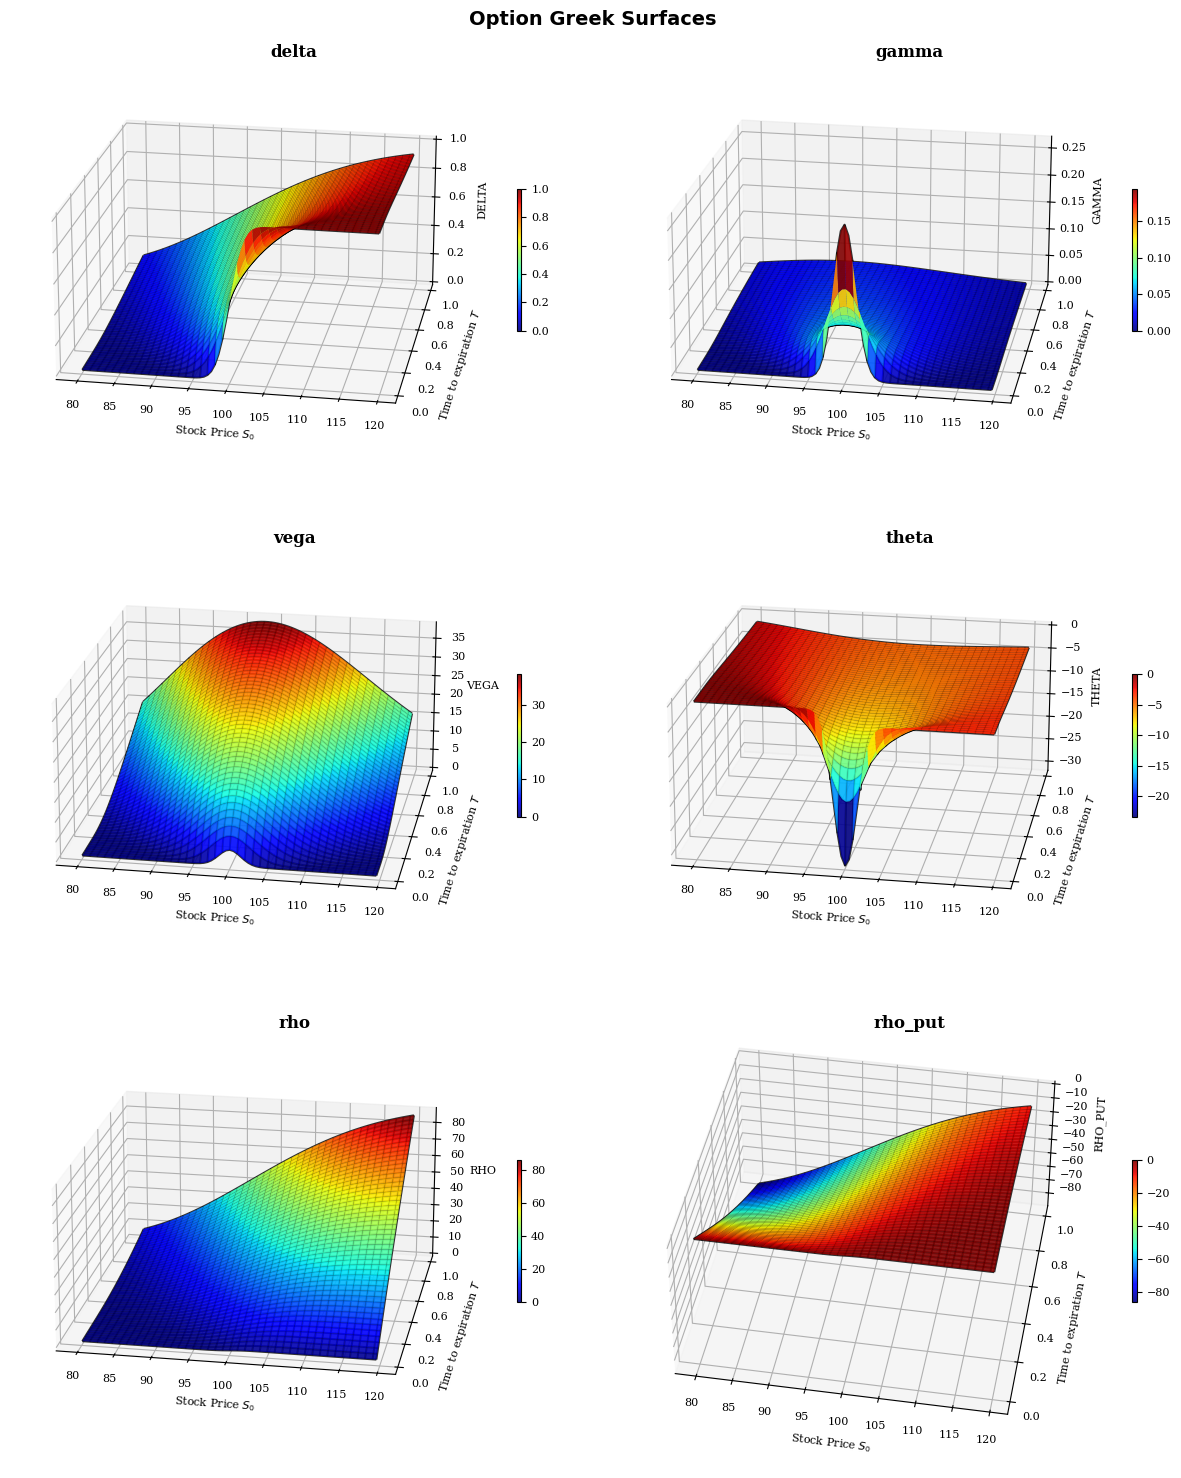

In [34]:
s = np.arange(80, 120, 0.5)
t = np.arange(0.01, 1.0, 0.01)
S, T = np.meshgrid(s, t)
K=100; sigma=0.15; r=0.03

GREEKS = [delta, gamma, vega, theta, rho, rho_put]

fig = plt.figure(figsize=(13, 15))
nrow=3; ncol=2
for idx, greek in enumerate(GREEKS, start=1):
    z = greek(S, K, T, r, sigma)
    ax = fig.add_subplot(nrow, ncol, idx, projection='3d')
    plot_3d_option(ax, S, T, z, greek.__name__, 'Stock Price $S_0$', 'Time to expiration $T$', greek.__name__.upper())
    if greek.__name__ == 'rho_put':
        ax.view_init(elev=40, azim=280, roll=0)

plt.suptitle('Option Greek Surfaces', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.tight_layout()
plt.show()

## Notes to self

- Maybe refactor all those plotters function into a more universal plotter function.

## References

[1] John C. Hull (Pearson 2022) - Options, Futures, and Other Derivatives

[2] Elisa Alòs, Raúl Merino (Chapman and Hall/CRC 2023) - Introduction to Financial Derivatives with Python